In [36]:
import numpy as np
import pandas as pd

dataset=pd.read_csv("https://raw.githubusercontent.com/RafsanJany-44/Research-NREM-REM/main/dataset/REM_NREM.csv")


target="Sleep_Stage"

classes = np.array(sorted(list(set(dataset[target]))))


In [37]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)

  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
dataset.head()

,Sleep_Stage,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,Spectral Edge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,Spectral Edge_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,Spectral Edge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,Spectral Edge_Gamma_O2,PeakF_Gamma_O2
0,NREM,0.00034,10.11512,17.85756,17.48293,10.24000,0.00047,17.73268,25.35024,27.47317,...,0.00112,0.74927,6.36878,2.87220,0.62439,0.000076,32.71805,43.83220,49.95122,49.95122
1,NREM,0.00035,10.73951,17.60780,17.10829,9.11610,0.00048,16.85854,25.22537,26.97366,...,0.00070,0.99902,6.86829,3.62146,0.74927,0.000072,32.09366,44.33171,49.95122,49.95122
2,NREM,0.00035,9.36585,17.60780,16.98341,9.24098,0.00042,17.35805,26.09951,28.47220,...,0.00077,1.49854,6.49366,4.12098,0.74927,0.000069,33.09268,43.95707,49.95122,49.95122
3,NREM,0.00050,10.36488,16.60878,15.85951,7.99220,0.00053,15.48488,24.10146,25.72488,...,0.00130,1.87317,6.11902,3.74634,0.37463,0.000070,31.59415,42.83317,49.95122,49.95122
4,NREM,0.00072,9.36585,15.98439,15.48488,7.99220,0.00067,15.11024,22.22829,23.22732,...,0.00123,1.49854,6.61854,3.74634,0.74927,0.000060,29.47122,45.08098,49.95122,49.95122


In [39]:
set(list(dataset[target]))

{'NREM', 'REM'}

In [40]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset[target]=encoder.fit_transform(dataset[target])

In [41]:

set(list(dataset[target]))

{0, 1}

In [42]:
X = dataset.loc[:, dataset.columns!=target]
y = dataset[target]

In [43]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [44]:
new_dataset=balance(X_test,y_test)

X_test = new_dataset.loc[:, new_dataset.columns!=target]
y_test = new_dataset[target]

1/150 round completed......................... Accurecy: 0.7644190871369294
2/150 round completed......................... Accurecy: 0.7092323651452282
3/150 round completed......................... Accurecy: 0.8087482710926694
4/150 round completed......................... Accurecy: 0.7691908713692946
5/150 round completed......................... Accurecy: 0.8248962655601659
6/150 round completed......................... Accurecy: 0.7969917012448133
7/150 round completed......................... Accurecy: 0.8353734439834025
8/150 round completed......................... Accurecy: 0.8107192254495159
9/150 round completed......................... Accurecy: 0.8384854771784233
10/150 round completed......................... Accurecy: 0.8195712309820193
11/150 round completed......................... Accurecy: 0.8433609958506224
12/150 round completed......................... Accurecy: 0.8286652835408023
13/150 round completed......................... Accurecy: 0.8479944674965422
14/150 r

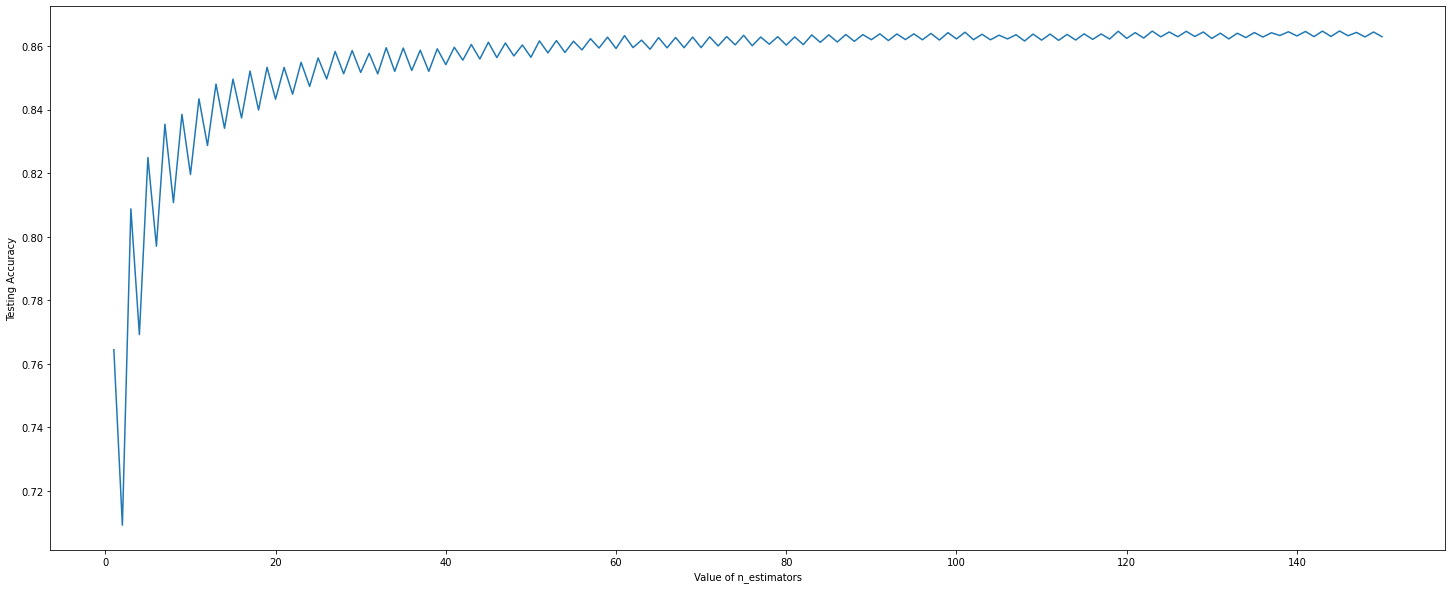

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

  2%|▏         | 1/50 [00:03<02:29,  3.06s/it]

1/50 round completed......................... Accurecy: 0.5


  4%|▍         | 2/50 [00:08<03:20,  4.17s/it]

2/50 round completed......................... Accurecy: 0.5


  6%|▌         | 3/50 [00:14<04:15,  5.44s/it]

3/50 round completed......................... Accurecy: 0.534612724757953


  8%|▊         | 4/50 [00:23<05:14,  6.84s/it]

4/50 round completed......................... Accurecy: 0.6162171507607193


 10%|█         | 5/50 [00:34<06:15,  8.34s/it]

5/50 round completed......................... Accurecy: 0.6538035961272476


 12%|█▏        | 6/50 [00:48<07:17,  9.95s/it]

6/50 round completed......................... Accurecy: 0.6901106500691563


 14%|█▍        | 7/50 [01:03<08:22, 11.69s/it]

7/50 round completed......................... Accurecy: 0.7252420470262794


 16%|█▌        | 8/50 [01:20<09:27, 13.51s/it]

8/50 round completed......................... Accurecy: 0.7540802213001383


 18%|█▊        | 9/50 [01:40<10:31, 15.41s/it]

9/50 round completed......................... Accurecy: 0.7782157676348548


 20%|██        | 10/50 [02:02<11:42, 17.55s/it]

10/50 round completed......................... Accurecy: 0.7946749654218533


 22%|██▏       | 11/50 [02:26<12:42, 19.55s/it]

11/50 round completed......................... Accurecy: 0.8132780082987552


 24%|██▍       | 12/50 [02:52<13:38, 21.55s/it]

12/50 round completed......................... Accurecy: 0.8261756569847856


 26%|██▌       | 13/50 [03:20<14:30, 23.53s/it]

13/50 round completed......................... Accurecy: 0.8375172890733057


 28%|██▊       | 14/50 [03:50<15:13, 25.37s/it]

14/50 round completed......................... Accurecy: 0.8452973720608575


 30%|███       | 15/50 [04:21<15:47, 27.07s/it]

15/50 round completed......................... Accurecy: 0.8525242047026279


 32%|███▏      | 16/50 [04:53<16:14, 28.66s/it]

16/50 round completed......................... Accurecy: 0.8568464730290456


 34%|███▍      | 17/50 [05:27<16:29, 29.99s/it]

17/50 round completed......................... Accurecy: 0.858402489626556


 36%|███▌      | 18/50 [06:00<16:36, 31.15s/it]

18/50 round completed......................... Accurecy: 0.8585408022130013


 38%|███▊      | 19/50 [06:35<16:36, 32.13s/it]

19/50 round completed......................... Accurecy: 0.8604080221300139


 40%|████      | 20/50 [07:10<16:30, 33.02s/it]

20/50 round completed......................... Accurecy: 0.8600276625172891


 42%|████▏     | 21/50 [07:45<16:18, 33.74s/it]

21/50 round completed......................... Accurecy: 0.8629668049792532


 44%|████▍     | 22/50 [08:21<15:59, 34.27s/it]

22/50 round completed......................... Accurecy: 0.8626210235131397


 46%|████▌     | 23/50 [08:57<15:37, 34.73s/it]

23/50 round completed......................... Accurecy: 0.862136929460581


 48%|████▊     | 24/50 [09:33<15:13, 35.12s/it]

24/50 round completed......................... Accurecy: 0.8618603042876902


 50%|█████     | 25/50 [10:09<14:44, 35.37s/it]

25/50 round completed......................... Accurecy: 0.8617911479944675


 52%|█████▏    | 26/50 [10:44<14:12, 35.51s/it]

26/50 round completed......................... Accurecy: 0.8624135546334717


 54%|█████▍    | 27/50 [11:20<13:37, 35.56s/it]

27/50 round completed......................... Accurecy: 0.8617565698478562


 56%|█████▌    | 28/50 [11:57<13:08, 35.84s/it]

28/50 round completed......................... Accurecy: 0.862448132780083


 58%|█████▊    | 29/50 [12:33<12:35, 35.98s/it]

29/50 round completed......................... Accurecy: 0.8621023513139696


 60%|██████    | 30/50 [13:09<12:01, 36.09s/it]

30/50 round completed......................... Accurecy: 0.8610650069156294


 62%|██████▏   | 31/50 [13:46<11:27, 36.19s/it]

31/50 round completed......................... Accurecy: 0.8610995850622407


 64%|██████▍   | 32/50 [14:23<10:55, 36.39s/it]

32/50 round completed......................... Accurecy: 0.8622060857538036


 66%|██████▌   | 33/50 [14:59<10:19, 36.41s/it]

33/50 round completed......................... Accurecy: 0.8622752420470263


 68%|██████▊   | 34/50 [15:35<09:42, 36.40s/it]

34/50 round completed......................... Accurecy: 0.862240663900415


 70%|███████   | 35/50 [16:12<09:06, 36.43s/it]

35/50 round completed......................... Accurecy: 0.862136929460581


 72%|███████▏  | 36/50 [16:48<08:28, 36.29s/it]

36/50 round completed......................... Accurecy: 0.8623789764868603


 74%|███████▍  | 37/50 [17:24<07:52, 36.32s/it]

37/50 round completed......................... Accurecy: 0.8621023513139696


 76%|███████▌  | 38/50 [18:00<07:14, 36.22s/it]

38/50 round completed......................... Accurecy: 0.8617565698478562


 78%|███████▊  | 39/50 [18:36<06:37, 36.11s/it]

39/50 round completed......................... Accurecy: 0.8619986168741356


 80%|████████  | 40/50 [19:12<06:00, 36.03s/it]

40/50 round completed......................... Accurecy: 0.8622060857538036


 82%|████████▏ | 41/50 [19:48<05:25, 36.13s/it]

41/50 round completed......................... Accurecy: 0.8622060857538036


 84%|████████▍ | 42/50 [20:24<04:48, 36.07s/it]

42/50 round completed......................... Accurecy: 0.8622060857538036


 86%|████████▌ | 43/50 [21:00<04:11, 36.00s/it]

43/50 round completed......................... Accurecy: 0.8622060857538036


 88%|████████▊ | 44/50 [21:36<03:35, 35.96s/it]

44/50 round completed......................... Accurecy: 0.8622060857538036


 90%|█████████ | 45/50 [22:12<03:00, 36.06s/it]

45/50 round completed......................... Accurecy: 0.8622060857538036


 92%|█████████▏| 46/50 [22:48<02:23, 35.99s/it]

46/50 round completed......................... Accurecy: 0.8622060857538036


 94%|█████████▍| 47/50 [23:24<01:47, 35.93s/it]

47/50 round completed......................... Accurecy: 0.8622060857538036


 96%|█████████▌| 48/50 [24:00<01:11, 35.94s/it]

48/50 round completed......................... Accurecy: 0.8622060857538036


 98%|█████████▊| 49/50 [24:36<00:36, 36.10s/it]

49/50 round completed......................... Accurecy: 0.8622060857538036


100%|██████████| 50/50 [25:12<00:00, 30.25s/it]

50/50 round completed......................... Accurecy: 0.8622060857538036
The best Depth:
21


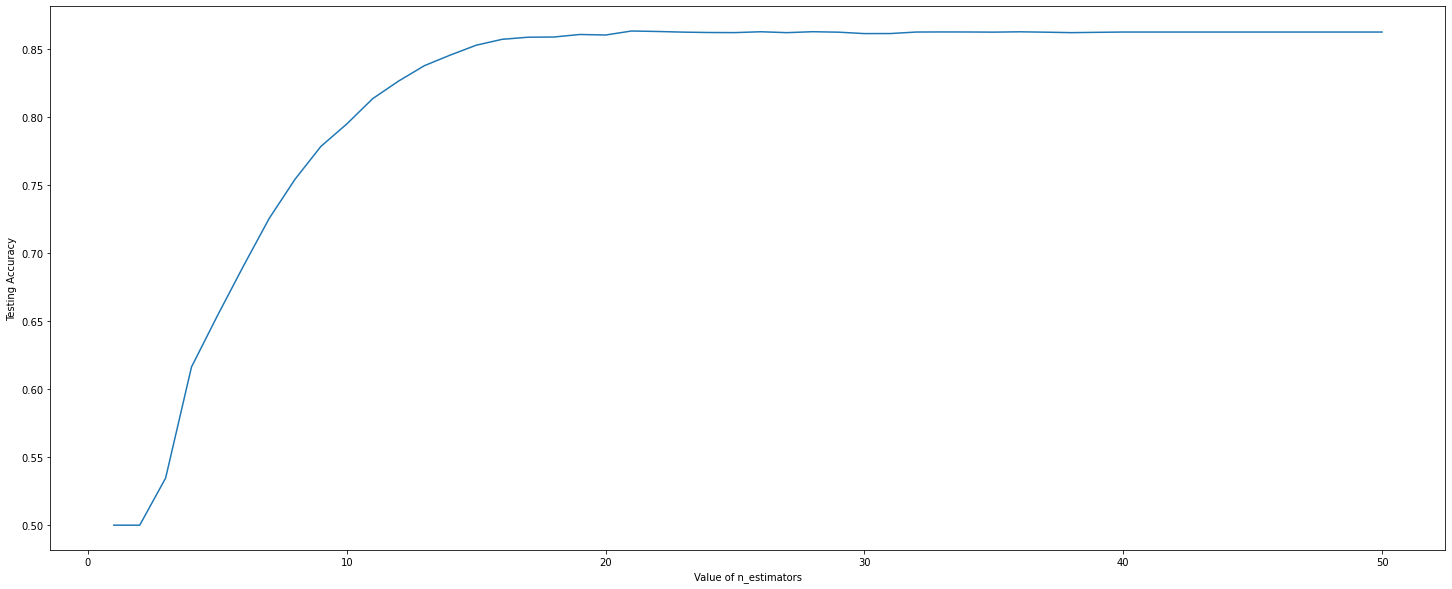

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
N=50
k_range = range (1,N+1)
scores={}
scores_list = []
for k in tqdm(k_range):
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[14127   333]
 [ 3580 10880]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88     14460
           1       0.97      0.75      0.85     14460

    accuracy                           0.86     28920
   macro avg       0.88      0.86      0.86     28920
weighted avg       0.88      0.86      0.86     28920

Accurecy:  0.8646957123098202


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[14117   343]
 [ 3620 10840]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88     14460
           1       0.97      0.75      0.85     14460

    accuracy                           0.86     28920
   macro avg       0.88      0.86      0.86     28920
weighted avg       0.88      0.86      0.86     28920

Accurecy:  0.8629668049792532


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[14125   335]
 [ 3610 10850]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88     14460
           1       0.97      0.75      0.85     14460

    accuracy                           0.86     28920
   macro avg       0.88      0.86      0.86     28920
weighted avg       0.88      0.86      0.86     28920

Accurecy:  0.8635892116182573
